# Pre-tabulated spectroscopic tables

NEMESIS performs the calculations of the gaseous opacities using pre-tabulated tables. These tables can either include the *k*-coefficients (Spectroscopy.*ILBL* = 0) (see [Irwin et al. (2008)](https://doi.org/10.1016/j.jqsrt.2007.11.006) for a detailed definition), or the line-by-line absorption cross sections computed at each specific wavelength (Spectroscopy.*ILBL* = 2). In this notebook, we provide some examples showing how archNEMESIS can be used to read this pre-tabulated tables that will later be used to compute the forward model. 

In archNEMESIS, the information about the Spectroscopy class is read from the HDF5 input files, in particular the number of gases *NGAS*, the flag for the look-up table type *ILBL*, and the location of the look-up tables *LOCATION*. In the case that we read the inputs from the standard NEMESIS files, then the main input files describing the spectroscopy of the gaseous species in the atmosphere are the *.kls* file (for *ILBL* = 0) and the *.lls* file (for *ILBL* = 2).

In [1]:
import archnemesis as ans
import numpy as np
import matplotlib.pyplot as plt

## 1. Reading the line-by-line tables

In this section, we show how archNEMESIS can be used to read the pre-tabulated line-by-line tables, which include the absorption cross sections of a given molecule in a grid of temperatures and pressures. In addition, archNEMESIS includes a set of functions to interpolate the cross sections to any specified pressure and temperature level. 

### Reading the header of the tables

In [2]:
#Initialising spectroscopy class with ILBL = 2 (line-by-line)
Spectroscopy = ans.Spectroscopy_0(ILBL=2)

Spectroscopy.NGAS = 2  #We define two gases in the class
Spectroscopy.LOCATION = ['h2o_lbltab.lta',
                         'co2_lbltab.lta']

#Reading the header information
Spectroscopy.read_header()

#Printing summary information
Spectroscopy.summary_info()

Calculation type ILBL ::  2  (line-by-line)
Number of radiatively-active gaseous species ::  2
Gaseous species ::  ['H2O (1)', 'CO2']
Number of spectral points ::  15001
Wavelength range ::  3750.0 - 3765.0000007124618
Step size ::  0.0010000000474974513
Number of temperature levels ::  5
Temperature range ::  100.0 - 200.0 K
Number of pressure levels ::  5
Pressure range ::  4.539993e-05 - 0.13533528 atm


### Reading the information in the tables

Once the header of the tables is read, we can also read the cross sections in a specified spectral range and store the data in the Spectroscopy class. Once this is performed, we can plot and analyse the cross sections or perform some other calculations. It must be noted that the cross sections in the pre-tabulated tables are multiplied by a factor of 10$^{20}$ that must be accounted for by the user.

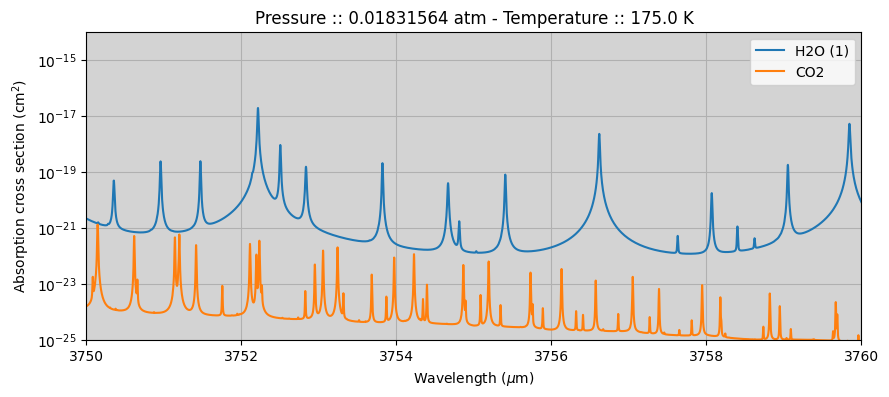

In [3]:
#Reading the information in the lbl-tables in a specified spectral range
Wavemin = 3750.
Wavemax = 3760.
Spectroscopy.read_tables(Wavemin,Wavemax)

#Plotting the cross sections at a given temperature and pressure
gasname = ['']*Spectroscopy.NGAS
for i in range(Spectroscopy.NGAS):
    gasname1 = ans.gas_info[str(Spectroscopy.ID[i])]['name']
    if Spectroscopy.ISO[i]!=0:
        gasname1 = gasname1+' ('+str(Spectroscopy.ISO[i])+')'
    gasname[i] = gasname1

#Plotting the cross sections
fig,ax1 = plt.subplots(1,1,figsize=(10,4))
iP = 3
iT = 3
for i in range(Spectroscopy.NGAS):
    ax1.plot(Spectroscopy.WAVE,Spectroscopy.K[:,iP,iT,i]*1.0e-20,label=gasname[i])
ax1.set_title('Pressure :: '+str(Spectroscopy.PRESS[iP])+' atm - Temperature :: '+str(Spectroscopy.TEMP[iT])+' K')
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylim(1.0e-25,1.0e-14)
ax1.set_xlim(Spectroscopy.WAVE.min(),Spectroscopy.WAVE.max())
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Absorption cross section (cm$^2$)')
ax1.set_facecolor('lightgray')
ax1.grid()

### Calculating the cross sections at an arbitrary temperature or pressure

The cross sections in the pre-tabulated tables are calculated at different levels of pressure and temperature. However, we might need to calculate the cross sections at a different level, which requires an interpolation. There is a function in archNEMESIS to perform this interpolation.

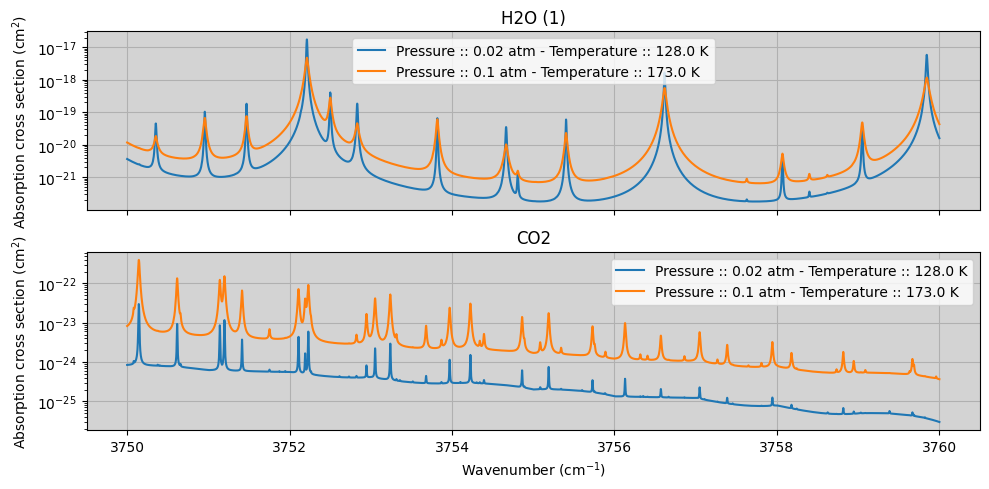

In [7]:
NPoints = 2
Press = [0.02,0.1]   #Atm
Temp = [128.,173.]

k = Spectroscopy.calc_klbl(NPoints,Press,Temp)

fig,(ax) = plt.subplots(2,1,figsize=(10,5),sharex=True)

for i in range(Spectroscopy.NGAS):
    for j in range(NPoints):
        ax[i].plot(Spectroscopy.WAVE,k[:,j,i]*1.0e-20,label='Pressure :: '+str(Press[j])+' atm - Temperature :: '+str(Temp[j])+' K')
    ax[i].set_yscale('log')
    ax[i].set_ylabel('Absorption cross section (cm$^2$)')
    ax[i].set_title(gasname[i])
    ax[i].legend()
    ax[i].grid()
    ax[i].set_facecolor('lightgray')
    
ax[Spectroscopy.NGAS-1].set_xlabel('Wavenumber (cm$^{-1}$)')

plt.tight_layout()


## 2. Reading the correlated-k tables

In this section, we show how archNEMESIS can be used to read the pre-tabulated *k* tables, which include information about the *k*-distribution of a given gas in a grid of temperatures and pressures. In addition, archNEMESIS includes a set of functions to interpolate the *k*-distributions to any specified pressure and temperature level. 

### Reading the header of the tables

In [8]:
#Initialising spectroscopy class with ILBL = 2 (correlated-k)
Spectroscopy = ans.Spectroscopy_0(ILBL=0)

Spectroscopy.NGAS = 2  #We define two gases in the class
Spectroscopy.LOCATION = ['h2o_ktab.kta',
                         'co2_ktab.kta']

#Reading the header information
Spectroscopy.read_header()

#Printing summary information
Spectroscopy.summary_info()

Calculation type ILBL ::  0  (k-distribution)
Number of radiatively-active gaseous species ::  2
Gaseous species ::  ['H2O', 'CO2']
Number of g-ordinates ::  10
Number of spectral points ::  351
Wavelength range ::  0.9125000238418579 - 5.287500089034438
Step size ::  0.012500000186264515
Spectral resolution of the k-tables (FWHM) ::  0.02500000037252903
Number of temperature levels ::  5
Temperature range ::  100.0 - 200.0 K
Number of pressure levels ::  5
Pressure range ::  3.0590232e-07 - 0.049787067 atm


### Reading the information in the tables

Once the header is read, we can also read the *k*-distributions in a specified spectral range and store the data in the Spectroscopy class. Once this is performed, we can plot and analyse the data or perform some other calculations. It must be noted that the *k*-coefficients in the pre-tabulated tables are multiplied by a factor of 10$^{20}$ that must be accounted for by the user.

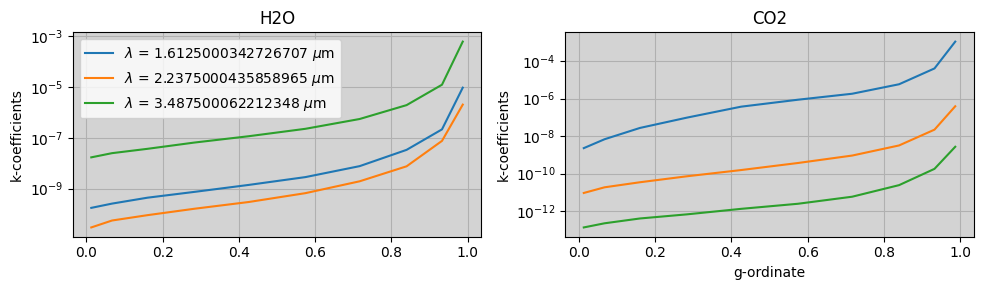

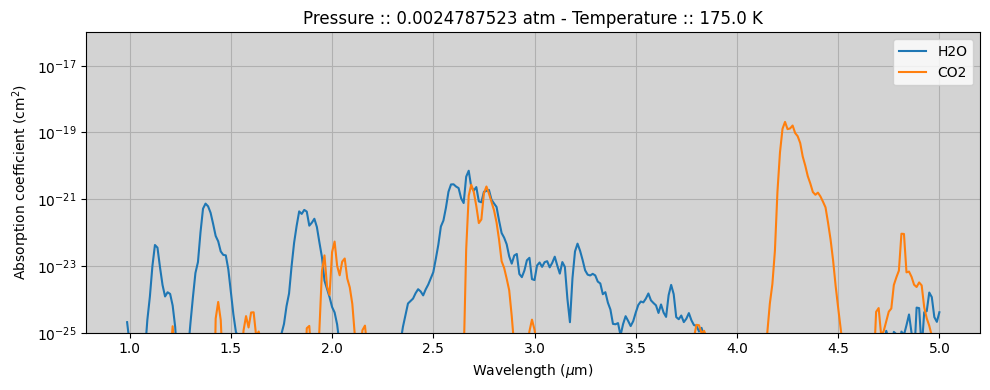

In [10]:
#Reading the information in the k-tables in a specified spectral range
Wavemin = 1.0
Wavemax = 5.0
Spectroscopy.read_tables(Wavemin,Wavemax)


#Plotting the k-coefficients at a given temperature and pressure
gasname = ['']*Spectroscopy.NGAS
for i in range(Spectroscopy.NGAS):
    gasname1 = ans.gas_info[str(Spectroscopy.ID[i])]['name']
    if Spectroscopy.ISO[i]!=0:
        gasname1 = gasname1+' ('+str(Spectroscopy.ISO[i])+')'
    gasname[i] = gasname1

    
#Plotting the k-distributions for a given bin
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3),sharex=True)

iP = 3
iT = 3

iWave = 50
ax1.semilogy(Spectroscopy.G_ORD,Spectroscopy.K[iWave,:,iP,iT,0],label='$\lambda$ = '+str(Spectroscopy.WAVE[iWave])+' $\mu$m')
ax2.semilogy(Spectroscopy.G_ORD,Spectroscopy.K[iWave,:,iP,iT,1],label='$\lambda$ = '+str(Spectroscopy.WAVE[iWave])+' $\mu$m')
 
iWave = 100
ax1.semilogy(Spectroscopy.G_ORD,Spectroscopy.K[iWave,:,iP,iT,0],label='$\lambda$ = '+str(Spectroscopy.WAVE[iWave])+' $\mu$m')
ax2.semilogy(Spectroscopy.G_ORD,Spectroscopy.K[iWave,:,iP,iT,1],label='$\lambda$ = '+str(Spectroscopy.WAVE[iWave])+' $\mu$m')
 
iWave = 200
ax1.semilogy(Spectroscopy.G_ORD,Spectroscopy.K[iWave,:,iP,iT,0],label='$\lambda$ = '+str(Spectroscopy.WAVE[iWave])+' $\mu$m')
ax2.semilogy(Spectroscopy.G_ORD,Spectroscopy.K[iWave,:,iP,iT,1],label='$\lambda$ = '+str(Spectroscopy.WAVE[iWave])+' $\mu$m')
 
ax1.set_title(gasname[0])
ax2.set_title(gasname[1])
ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')
ax1.legend()
ax1.grid()
ax2.grid()
ax1.set_ylabel('k-coefficients')
ax2.set_xlabel('g-ordinate')
ax2.set_ylabel('k-coefficients')
plt.tight_layout()




#Plotting the cross sections as a function of wavelength

k1 = np.matmul(Spectroscopy.K[:,:,iP,iT,0],Spectroscopy.DELG)
k2 = np.matmul(Spectroscopy.K[:,:,iP,iT,1],Spectroscopy.DELG)

fig,ax1 = plt.subplots(1,1,figsize=(10,4))
ax1.plot(Spectroscopy.WAVE,k1*1.0e-20,label=gasname[0])
ax1.plot(Spectroscopy.WAVE,k2*1.0e-20,label=gasname[1])
ax1.set_ylim(1.0e-25,1.0e-16)
ax1.legend()
#ax1.set_xlim(0.30,0.32)
ax1.grid()

ax1.set_title('Pressure :: '+str(Spectroscopy.PRESS[iP])+' atm - Temperature :: '+str(Spectroscopy.TEMP[iT])+' K')
ax1.set_yscale('log')
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Absorption coefficient (cm$^2$)')
ax1.set_facecolor('lightgray')
plt.tight_layout()

### Calculating the *k* distributions at an arbitrary pressure and temperature

Finally, and similarly as performed with the line-by-line absorption cross sections, the *k*-coefficients can also be interpolated to any given temperature and pressure using the Spectroscopy class. 

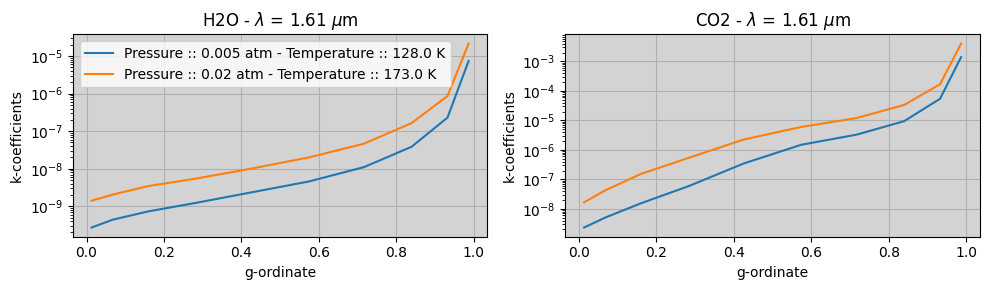

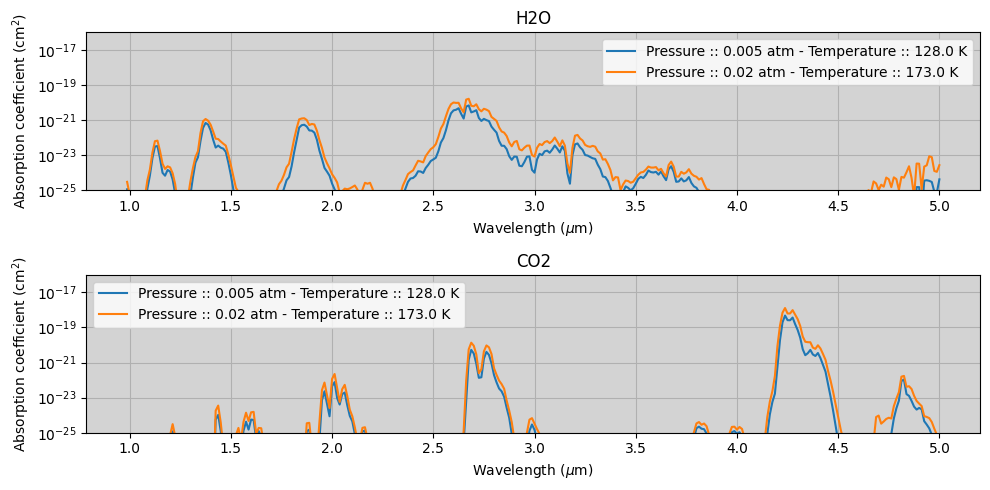

In [11]:
NPoints = 2
Press = [0.005,0.02]   #Atm
Temp = [128.,173.]

k = Spectroscopy.calc_k(NPoints,Press,Temp)

#Plotting the k-distributions for a given bin
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3),sharex=True)

iP = 3
iT = 3

iWave = 50
ax1.semilogy(Spectroscopy.G_ORD,k[iWave,:,0,0],label='Pressure :: '+str(Press[0])+' atm - Temperature :: '+str(Temp[0])+' K')
ax1.semilogy(Spectroscopy.G_ORD,k[iWave,:,1,0],label='Pressure :: '+str(Press[1])+' atm - Temperature :: '+str(Temp[1])+' K')

ax2.semilogy(Spectroscopy.G_ORD,k[iWave,:,0,1],label='Pressure :: '+str(Press[0])+' atm - Temperature :: '+str(Temp[0])+' K')
ax2.semilogy(Spectroscopy.G_ORD,k[iWave,:,1,1],label='Pressure :: '+str(Press[1])+' atm - Temperature :: '+str(Temp[1])+' K')

ax1.set_title(gasname[0]+' - $\lambda$ = '+str(np.round(Spectroscopy.WAVE[iWave],2))+' $\mu$m')
ax2.set_title(gasname[1]+' - $\lambda$ = '+str(np.round(Spectroscopy.WAVE[iWave],2))+' $\mu$m')
ax1.legend()
ax1.grid()
ax2.grid()
ax1.set_xlabel('g-ordinate')
ax1.set_ylabel('k-coefficients')
ax2.set_xlabel('g-ordinate')
ax2.set_ylabel('k-coefficients')
ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')
plt.tight_layout()




#Plotting the cross sections as a function of wavelength

k11 = np.matmul(k[:,:,0,0],Spectroscopy.DELG)
k21 = np.matmul(k[:,:,1,0],Spectroscopy.DELG)
k12 = np.matmul(k[:,:,0,1],Spectroscopy.DELG)
k22 = np.matmul(k[:,:,1,1],Spectroscopy.DELG)

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,5))

ax1.plot(Spectroscopy.WAVE,k11*1.0e-20,label='Pressure :: '+str(Press[0])+' atm - Temperature :: '+str(Temp[0])+' K')
ax1.plot(Spectroscopy.WAVE,k21*1.0e-20,label='Pressure :: '+str(Press[1])+' atm - Temperature :: '+str(Temp[1])+' K')

ax2.plot(Spectroscopy.WAVE,k12*1.0e-20,label='Pressure :: '+str(Press[0])+' atm - Temperature :: '+str(Temp[0])+' K')
ax2.plot(Spectroscopy.WAVE,k22*1.0e-20,label='Pressure :: '+str(Press[1])+' atm - Temperature :: '+str(Temp[1])+' K')

ax1.set_ylim(1.0e-25,1.0e-16)
ax1.legend()
ax1.grid()
ax2.set_ylim(1.0e-25,1.0e-16)
ax2.legend()
ax2.grid()

ax1.set_title(gasname[0])
ax2.set_title(gasname[1])
ax1.set_yscale('log')
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Absorption coefficient (cm$^2$)')
ax2.set_yscale('log')
ax2.set_xlabel('Wavelength ($\mu$m)')
ax2.set_ylabel('Absorption coefficient (cm$^2$)')
ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')
plt.tight_layout()


## 3. Reading the tables from the input files

Similar to the examples we have shown in the two previous sections, we can initialise the Spectroscopy class by reading the inputs files instead. In particular, we can use the built-in functions in the Spectroscopy class to perform this calculations.

### Initialising the class from the archNEMESIS HDF5 input file

In [12]:
#Initialising the class
Spectroscopy = ans.Spectroscopy_0(ILBL=2)
Spectroscopy.NGAS = 2  #We define two gases in the class
Spectroscopy.LOCATION = ['h2o_lbltab.lta',
                         'co2_lbltab.lta']

#Writing information into HDF5 file
Spectroscopy.write_hdf5('example_archnemesis')

#Later, we can read this file to read directly the information in the HDF5 file
Spectroscopy = ans.Spectroscopy_0()
Spectroscopy.read_hdf5('example_archnemesis')
Spectroscopy.summary_info()

Calculation type ILBL ::  2  (line-by-line)
Number of radiatively-active gaseous species ::  2
Gaseous species ::  ['H2O (1)', 'CO2']
Number of spectral points ::  15001
Wavelength range ::  3750.0 - 3765.0000007124618
Step size ::  0.0010000000474974513
Number of temperature levels ::  5
Temperature range ::  100.0 - 200.0 K
Number of pressure levels ::  5
Pressure range ::  4.539993e-05 - 0.13533528 atm


### Initialising the class from the NEMESIS *.lls* and *.kls* files

In [13]:
#.lls file
#############################################################

#Writing name of the .lls file including the path to the pre-tabulated table
LBLname1 = 'h2o_lbltab.lta'
LBLname2 = 'co2_lbltab.lta'

f = open('example.lls','w')
f.write(LBLname1+' \n')
f.write(LBLname2)
f.close()

#Initialising spectroscopy class with ILBL = 2 (line-by-line)
Spectroscopy = ans.Spectroscopy_0(ILBL=2)

#Reading .lls file
#Note this function just read the headers of the pre-tabulated tables to get some preliminary information
Spectroscopy.read_lls('example')

#Printing summary information
Spectroscopy.summary_info()


#.kls file
#############################################################

print('----------------------------------------------------')

#Writing name of the .kls file including the path to the pre-tabulated table
Kname1 = 'h2o_ktab.kta'
Kname2 = 'co2_ktab.kta'


f = open('example.kls','w')
f.write(Kname1+' \n')
f.write(Kname2)
f.close()

#Initialising spectroscopy class with ILBL = 0 (correlated k)
Spectroscopy = ans.Spectroscopy_0(ILBL=0)

#Reading .kls file
#Note this function just read the headers of the pre-tabulated tables to get some preliminary information
Spectroscopy.read_kls('example')

#Printing summary information
Spectroscopy.summary_info()

Calculation type ILBL ::  2  (line-by-line)
Number of radiatively-active gaseous species ::  2
Gaseous species ::  ['H2O (1)', 'CO2']
Number of spectral points ::  15001
Wavelength range ::  3750.0 - 3765.0000007124618
Step size ::  0.0010000000474974513
Number of temperature levels ::  5
Temperature range ::  100.0 - 200.0 K
Number of pressure levels ::  5
Pressure range ::  4.539993e-05 - 0.13533528 atm
----------------------------------------------------
Calculation type ILBL ::  0  (k-distribution)
Number of radiatively-active gaseous species ::  2
Gaseous species ::  ['H2O', 'CO2']
Number of g-ordinates ::  10
Number of spectral points ::  351
Wavelength range ::  0.9125000238418579 - 5.287500089034438
Step size ::  0.012500000186264515
Spectral resolution of the k-tables (FWHM) ::  0.02500000037252903
Number of temperature levels ::  5
Temperature range ::  100.0 - 200.0 K
Number of pressure levels ::  5
Pressure range ::  3.0590232e-07 - 0.049787067 atm
